In [1]:
import pymc as pm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
from thesis_tools.utils.data import *

# Test self-made lib

In [3]:
from thesis_tools.models.bayesian_multivariate_cross_sectional import *

In [4]:
df = read_billionaires_data(only_years=['2018'])

In [5]:
model = Multivariate_GeneralisedPareto(data=df)

In [6]:
model.fit()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [gamma_false_loc, sigma]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 15 seconds.


## Check prior predictive

In [7]:
prior = model.prior_predictive()
pd.DataFrame(prior)

Sampling: [gamma_false_loc, sigma, y]


,gamma,sigma,y
Alps,"[0.7324930408230472, 0.5743374184765413, 0.357...","[2.3483208466274106, 0.423995909106098, 0.9715...","[1.706858602918214, 6.6599901699835735, 6.1270..."
Asian Islands,"[0.5462801516956186, 0.633148819162016, 0.5802...","[0.15472296194577204, 0.7087741406506416, 1.47...","[2.9551830334581615, 1.0853042080544535, 1.299..."
Australia,"[0.6182624548075675, 0.10455588504366675, 0.74...","[0.25704076383510926, 0.03637279571756241, 0.2...","[5.792041956852641, 1.3349764114372669, 1.1760..."
Brazil,"[0.37208032407462743, 0.40743562847217063, 0.6...","[0.8106404415697338, 1.2449064911038201, 0.484...","[4.764992901345123, 1.3144712621685755, 1.5421..."
British Islands,"[0.7125353614641645, 0.2499464928781452, 0.267...","[3.594415394127685, 0.16937546511822915, 1.721...","[1.5674771969010683, 1.075736043384085, 1.0003..."
Canada,"[0.7504977336043577, 0.5218663199205755, 0.550...","[0.11351992835881906, 2.8376257893312165, 0.24...","[39.61670070293555, 1.572825994343363, 1.11096..."
China,"[0.7797831754329565, 0.6270585615709572, 0.599...","[0.17521960532325864, 5.571439184145222, 1.527...","[1.2405082209806644, 1.0032950100225495, 1.538..."
France,"[0.6413654907694477, 0.423891290011275, 0.4707...","[3.8532375845537876, 0.4240519458426736, 0.905...","[1.0157199692525822, 4.606956662820849, 1.0137..."
Germany,"[0.2815710217201387, 0.5295666947612896, 0.614...","[2.8367584585210506, 0.15755314242629023, 2.31...","[2.5930724138320427, 1.4120883806442723, 1.276..."
India,"[0.4368849980112345, 0.4795009794448871, 0.777...","[1.8295486249132344, 0.6777180325561215, 2.275...","[1.0861408886414283, 1.491165595000805, 2.9168..."


In [8]:
prior_summary = model.get_prior_summary()

Sampling: [gamma_false_loc, sigma, y]
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)


In [14]:
prior_summary.get_group('gamma')

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat,prefix
group,,,,,,,,,,
Alps,0.60,0.20,0.28,1.03,0.01,0.01,512.57,321.69,NaN,gamma
Asian Islands,0.60,0.19,0.29,0.99,0.01,0.01,427.56,461.64,NaN,gamma
Australia,0.61,0.19,0.29,0.97,0.01,0.01,466.10,351.92,NaN,gamma
Brazil,0.60,0.19,0.26,0.95,0.01,0.01,660.17,372.99,NaN,gamma
British Islands,0.59,0.19,0.26,0.96,0.01,0.01,439.96,549.01,NaN,gamma
Canada,0.62,0.19,0.31,1.01,0.01,0.01,449.47,501.06,NaN,gamma
China,0.60,0.18,0.23,0.91,0.01,0.01,553.19,369.19,NaN,gamma
France,0.61,0.20,0.26,0.99,0.01,0.01,477.53,515.11,NaN,gamma
Germany,0.59,0.19,0.26,0.93,0.01,0.01,352.91,320.00,NaN,gamma


In [15]:
prior_summary.get_group('sigma')

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat,prefix
group,,,,,,,,,,
Alps,0.99,0.99,0.0,2.60,0.04,0.03,526.82,404.87,NaN,sigma
Asian Islands,0.91,0.95,0.0,2.55,0.04,0.03,454.14,430.99,NaN,sigma
Australia,1.05,0.99,0.0,2.95,0.04,0.03,555.66,428.31,NaN,sigma
Brazil,0.91,0.93,0.0,2.69,0.04,0.03,454.76,558.68,NaN,sigma
British Islands,1.06,1.10,0.0,3.15,0.05,0.03,548.23,515.11,NaN,sigma
Canada,1.02,1.07,0.0,2.70,0.05,0.04,424.88,470.74,NaN,sigma
China,1.02,0.98,0.0,3.06,0.05,0.03,446.20,448.99,NaN,sigma
France,0.97,0.96,0.0,2.70,0.04,0.03,556.77,438.95,NaN,sigma
Germany,0.99,1.01,0.0,2.87,0.05,0.03,469.90,421.32,NaN,sigma


## Check posterior predictive

In [26]:
posterior = model.posterior_predictive(n_dependent_samples=1000)
posterior_df = pd.DataFrame(posterior)
posterior_df

,gamma,sigma,y
Alps,"[0.5098354272843477, 0.3857563283563099, 0.457...","[1.6606847916047784, 1.925484911288527, 1.9489...","[5.6767803455361525, 1.5260070360951303, 1.884..."
Asian Islands,"[0.46085875428207934, 0.8208096419951418, 0.35...","[1.0465154283327782, 1.2589226836822844, 0.925...","[3.644965823322668, 2.672966034798793, 2.68502..."
Australia,"[0.460971394789057, 0.582600989175444, 0.61137...","[1.2522858871252536, 0.816764474485749, 0.9428...","[2.1649272802400104, 4.129865719154077, 8.0347..."
Brazil,"[0.8513522562316835, 0.4537168996059101, 0.613...","[1.8920899837001435, 1.0441792938115795, 2.683...","[6.515964390118832, 2.4629843919248966, 4.7483..."
British Islands,"[0.6690151216967677, 0.5913379841638267, 0.610...","[1.3490874651202114, 2.24674026660109, 1.04159...","[8.642053821955955, 3.739633354051162, 1.32390..."
Canada,"[0.5879629982136558, 0.44401252063523633, 0.70...","[0.8399004971524127, 1.1599474200470568, 0.990...","[1.1888002945099194, 7.49101804876971, 2.15331..."
China,"[0.8016633034233052, 0.7733133294481878, 0.606...","[0.6995687304210527, 0.9076922640776827, 0.917...","[53.06497587458944, 2.149991334509542, 7.45543..."
France,"[0.5291924589094059, 0.5890265476970351, 0.773...","[2.294778057356417, 3.366501472883086, 1.55433...","[5.532488825945075, 1.1790548061405035, 3.8171..."
Germany,"[0.47638638401153854, 0.7737952055281423, 0.30...","[2.237226616880452, 1.8511269343031875, 2.3273...","[1.3149622630234628, 3.973855087517257, 2.2902..."
India,"[0.6431339630961626, 0.6472469061116877, 0.378...","[1.1666219103696547, 1.4957062430940595, 1.402...","[6.28588871803995, 7.458703410358287, 3.899557..."


In [27]:
# append a new column that is the mean of the list stored in the 'y' column
posterior_df['y_mean'] = posterior_df['y'].apply(lambda x: np.mean(x))

In [28]:
posterior_df

,gamma,sigma,y,y_mean
Alps,"[0.5098354272843477, 0.3857563283563099, 0.457...","[1.6606847916047784, 1.925484911288527, 1.9489...","[5.6767803455361525, 1.5260070360951303, 1.884...",4.585512
Asian Islands,"[0.46085875428207934, 0.8208096419951418, 0.35...","[1.0465154283327782, 1.2589226836822844, 0.925...","[3.644965823322668, 2.672966034798793, 2.68502...",4.573955
Australia,"[0.460971394789057, 0.582600989175444, 0.61137...","[1.2522858871252536, 0.816764474485749, 0.9428...","[2.1649272802400104, 4.129865719154077, 8.0347...",3.190179
Brazil,"[0.8513522562316835, 0.4537168996059101, 0.613...","[1.8920899837001435, 1.0441792938115795, 2.683...","[6.515964390118832, 2.4629843919248966, 4.7483...",5.456915
British Islands,"[0.6690151216967677, 0.5913379841638267, 0.610...","[1.3490874651202114, 2.24674026660109, 1.04159...","[8.642053821955955, 3.739633354051162, 1.32390...",4.740988
Canada,"[0.5879629982136558, 0.44401252063523633, 0.70...","[0.8399004971524127, 1.1599474200470568, 0.990...","[1.1888002945099194, 7.49101804876971, 2.15331...",4.545657
China,"[0.8016633034233052, 0.7733133294481878, 0.606...","[0.6995687304210527, 0.9076922640776827, 0.917...","[53.06497587458944, 2.149991334509542, 7.45543...",3.752716
France,"[0.5291924589094059, 0.5890265476970351, 0.773...","[2.294778057356417, 3.366501472883086, 1.55433...","[5.532488825945075, 1.1790548061405035, 3.8171...",8.402247
Germany,"[0.47638638401153854, 0.7737952055281423, 0.30...","[2.237226616880452, 1.8511269343031875, 2.3273...","[1.3149622630234628, 3.973855087517257, 2.2902...",5.422138
India,"[0.6431339630961626, 0.6472469061116877, 0.378...","[1.1666219103696547, 1.4957062430940595, 1.402...","[6.28588871803995, 7.458703410358287, 3.899557...",4.278722


In [19]:
posterior_summary = model.get_posterior_summary()

In [22]:
posterior_summary.groups

{'gamma': ['Alps', 'Asian Islands', 'Australia', 'Brazil', 'British Islands', 'Canada', 'China', 'France', 'Germany', 'India', 'Israel + Turkey', 'Italy', 'Japan', 'Not a sub-region', 'Russia', 'Scandinavia', 'South Korea', 'Southeast Asia', 'U.S.'], 'sigma': ['Alps', 'Asian Islands', 'Australia', 'Brazil', 'British Islands', 'Canada', 'China', 'France', 'Germany', 'India', 'Israel + Turkey', 'Italy', 'Japan', 'Not a sub-region', 'Russia', 'Scandinavia', 'South Korea', 'Southeast Asia', 'U.S.']}

In [20]:
posterior_summary.get_group('gamma')

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat,prefix
group,,,,,,,,,,
Alps,0.43,0.14,0.18,0.68,0.0,0.0,6192.25,3388.77,1.0,gamma
Asian Islands,0.56,0.14,0.31,0.81,0.0,0.0,5863.30,3157.40,1.0,gamma
Australia,0.58,0.15,0.28,0.83,0.0,0.0,5352.88,3136.80,1.0,gamma
Brazil,0.57,0.15,0.30,0.84,0.0,0.0,5919.86,3285.12,1.0,gamma
British Islands,0.54,0.14,0.28,0.79,0.0,0.0,5791.94,3369.16,1.0,gamma
Canada,0.61,0.15,0.32,0.89,0.0,0.0,4829.19,3152.63,1.0,gamma
China,0.69,0.08,0.56,0.84,0.0,0.0,5796.54,3004.66,1.0,gamma
France,0.67,0.15,0.40,0.96,0.0,0.0,7245.35,3130.51,1.0,gamma
Germany,0.46,0.11,0.27,0.67,0.0,0.0,5041.66,3260.61,1.0,gamma


In [23]:
posterior_summary.get_group('sigma')

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat,prefix
group,,,,,,,,,,
Alps,2.00,0.40,1.32,2.79,0.01,0.00,5363.62,3250.82,1.0,sigma
Asian Islands,1.13,0.22,0.76,1.56,0.00,0.00,6293.14,3220.11,1.0,sigma
Australia,0.92,0.21,0.56,1.32,0.00,0.00,6090.52,3392.97,1.0,sigma
Brazil,1.61,0.36,0.97,2.28,0.00,0.00,7254.28,3476.78,1.0,sigma
British Islands,1.63,0.32,1.06,2.23,0.00,0.00,4714.97,3060.19,1.0,sigma
Canada,1.07,0.24,0.64,1.53,0.00,0.00,5840.04,3395.02,1.0,sigma
China,0.89,0.08,0.76,1.05,0.00,0.00,5374.82,2922.66,1.0,sigma
France,2.46,0.57,1.42,3.50,0.01,0.01,6366.75,3303.44,1.0,sigma
Germany,2.25,0.31,1.66,2.79,0.00,0.00,5929.51,3238.96,1.0,sigma


## Check trace

In [24]:
trace = model.get_trace()

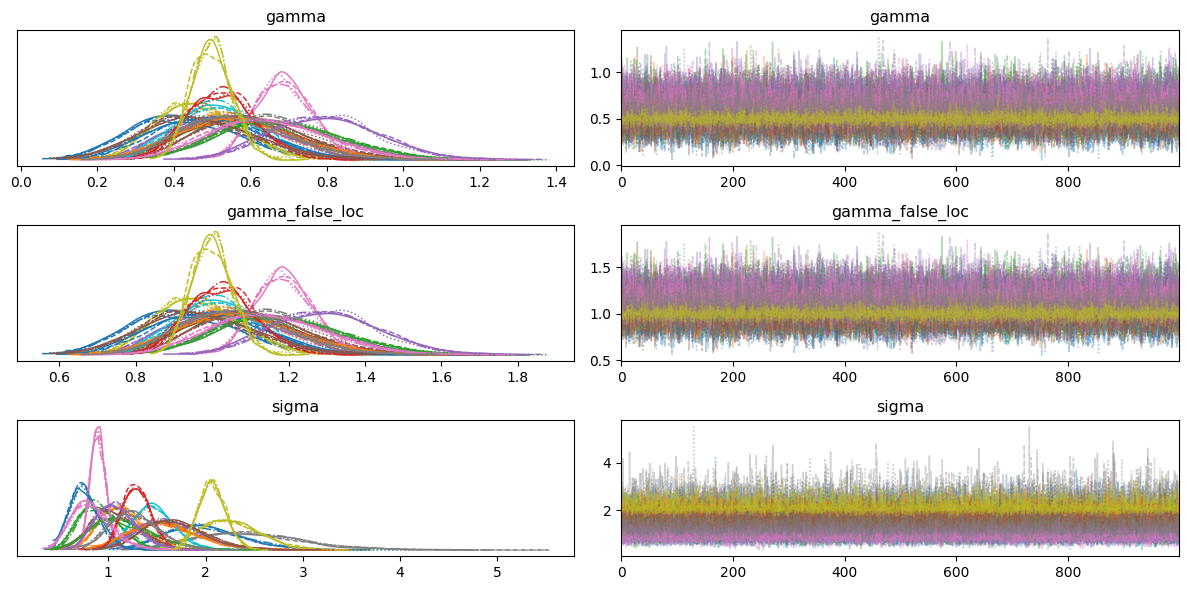

In [25]:
az.plot_trace(trace)
plt.tight_layout()